This notebook is for creating plots based on the following file
- `StreamingHistory3_enriched_activity.csv`

...which is obtained by running these notebooks (in chronological order):
1. `1_spotify_enrichment.ipynb`
2. `2_activity_enrichment.ipynb`

In [250]:
import pandas as pd
import numpy as np
import json
import ast
import datetime
from tqdm.notebook import tqdm
import pandasql as ps
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler

### Import Streaming history

In [251]:
df = pd.read_csv('StreamingHistory3_enriched_activity.csv')
df['genres'] = df['genres'].apply(literal_eval) #convert to list type
df.to_csv('StreamingHistory3_enriched_activity_genres.csv', index=False)
df = pd.read_csv('StreamingHistory3_enriched_activity_genres.csv')
df['genres'] = df['genres'].apply(literal_eval) #convert to list type

df.head(5)

,endTime,track_id,track_name,track_artist,genres,msPlayed,audio_data,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,startTime,dayofweek_nr,day_name,startTime_hour,month_nr,month_name,activity_type
0,2021-12-30 19:06:00,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Drake,"[canadian hip hop, canadian pop, hip hop, rap,...",38165.0,"[{'danceability': 0.803, 'energy': 0.597, 'key...",0.803,0.597,11,-6.035,0,0.141,0.000619,0.000005,0.3230,0.331,136.008,audio_features,0k1WUmIRnG3xU6fvvDVfRG,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,https://api.spotify.com/v1/tracks/0k1WUmIRnG3x...,https://api.spotify.com/v1/audio-analysis/0k1W...,257605,4,2021-12-30 19:05:21.835000,3,Thursday,19,12,December,study
1,2021-12-30 19:06:00,4eL3XeuGaEoVT8ttDh3hwY,too easy,Gunna,"[atl hip hop, melodic rap, rap, trap]",4224.0,"[{'danceability': 0.798, 'energy': 0.574, 'key...",0.798,0.574,1,-6.548,1,0.157,0.024000,0.000000,0.1220,0.309,155.964,audio_features,4eL3XeuGaEoVT8ttDh3hwY,spotify:track:4eL3XeuGaEoVT8ttDh3hwY,https://api.spotify.com/v1/tracks/4eL3XeuGaEoV...,https://api.spotify.com/v1/audio-analysis/4eL3...,138587,4,2021-12-30 19:05:55.776000,3,Thursday,19,12,December,study
2,2021-12-30 19:06:00,5yY9lUy8nbvjM1Uyo1Uqoc,Life Is Good (feat. Drake),Future,"[atl hip hop, hip hop, pop rap, rap, southern ...",6506.0,"[{'danceability': 0.676, 'energy': 0.609, 'key...",0.676,0.609,2,-5.831,0,0.481,0.070600,0.000000,0.1520,0.508,142.037,audio_features,5yY9lUy8nbvjM1Uyo1Uqoc,spotify:track:5yY9lUy8nbvjM1Uyo1Uqoc,https://api.spotify.com/v1/tracks/5yY9lUy8nbvj...,https://api.spotify.com/v1/audio-analysis/5yY9...,237735,4,2021-12-30 19:05:53.494000,3,Thursday,19,12,December,study
3,2021-12-30 19:07:00,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Drake,"[canadian hip hop, canadian pop, hip hop, rap,...",15935.0,"[{'danceability': 0.803, 'energy': 0.597, 'key...",0.803,0.597,11,-6.035,0,0.141,0.000619,0.000005,0.3230,0.331,136.008,audio_features,0k1WUmIRnG3xU6fvvDVfRG,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,https://api.spotify.com/v1/tracks/0k1WUmIRnG3x...,https://api.spotify.com/v1/audio-analysis/0k1W...,257605,4,2021-12-30 19:06:44.065000,3,Thursday,19,12,December,study
4,2021-12-30 19:07:00,0k7wmahjkn389wAZdz19Cv,Drankin N Smokin,Future,"[atl hip hop, hip hop, pop rap, rap, southern ...",59520.0,"[{'danceability': 0.752, 'energy': 0.658, 'key...",0.752,0.658,0,-6.297,1,0.342,0.042100,0.000000,0.0927,0.387,151.951,audio_features,0k7wmahjkn389wAZdz19Cv,spotify:track:0k7wmahjkn389wAZdz19Cv,https://api.spotify.com/v1/tracks/0k7wmahjkn38...,https://api.spotify.com/v1/audio-analysis/0k7w...,213520,4,2021-12-30 19:06:00.480000,3,Thursday,19,12,December,study


In [252]:
df['activity_type'].value_counts()

study       3758
relax       2289
work        2257
exercise     658
Name: activity_type, dtype: int64

In [253]:
pd.set_option('display.max_columns', None)

### Assign random genres

In [254]:
df.genres.explode()

0       canadian hip hop
0           canadian pop
0                hip hop
0                    rap
0            toronto rap
              ...       
8959      danish hip hop
8959          danish pop
8960      danish hip hop
8960          danish pop
8961      danish hip hop
Name: genres, Length: 27157, dtype: object

In [255]:
df['genres'].explode().value_counts()

danish pop              2177
rap                     1814
pop                     1649
danish hip hop          1529
hip hop                 1447
                        ... 
dark trap                  1
dark techno                1
deep minimal techno        1
funky tech house           1
reggaeton colombiano       1
Name: genres, Length: 631, dtype: int64

In [256]:
df_temp = pd.DataFrame(df['genres'].explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp

,genres,count
0,danish pop,2177
1,rap,1814
2,pop,1649
3,danish hip hop,1529
4,hip hop,1447
...,...,...
626,dark trap,1
627,dark techno,1
628,deep minimal techno,1
629,funky tech house,1


In [257]:
df_temp = df_temp[:10]

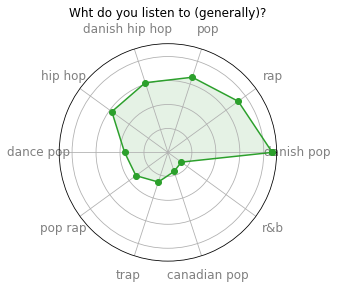

In [258]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Wht do you listen to (generally)?")
plt.show()

### Per activity

In [259]:
df.activity_type.unique()

array(['study', 'relax', 'work', 'exercise'], dtype=object)

In [263]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'study']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]
df_temp

,genres,count
0,danish pop,974
1,rap,823
2,pop,729
3,danish hip hop,668
4,hip hop,624
5,dance pop,405
6,pop rap,339
7,trap,278
8,edm,163
9,canadian pop,159


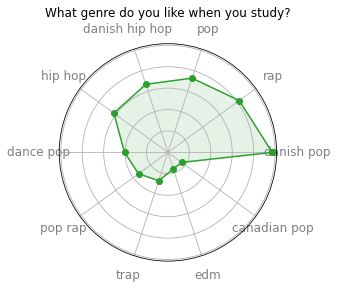

In [265]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'study']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("What genre do you like when you study?")
plt.show()

In [266]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'work']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]
df_temp

,genres,count
0,danish pop,486
1,pop,437
2,rap,428
3,danish hip hop,346
4,hip hop,335
5,dance pop,232
6,pop rap,210
7,trap,165
8,background jazz,100
9,canadian pop,96


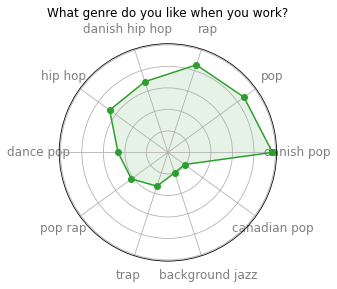

In [267]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'work']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("What genre do you like when you work?")
plt.show()

In [268]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'relax']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]
df_temp

,genres,count
0,danish pop,572
1,rap,461
2,danish hip hop,427
3,hip hop,395
4,pop,373
5,pop rap,235
6,dance pop,207
7,trap,177
8,canadian pop,117
9,dakke dak,103


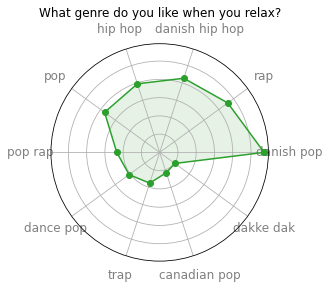

In [269]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'relax']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("What genre do you like when you relax?")
plt.show()

In [270]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'exercise']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]
df_temp

,genres,count
0,danish pop,145
1,pop,110
2,rap,102
3,hip hop,93
4,danish hip hop,88
5,dance pop,60
6,canadian pop,46
7,pop rap,41
8,jazz,32
9,canadian hip hop,31


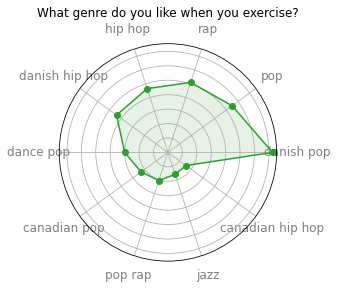

In [272]:
df_temp = pd.DataFrame(
    df[df.activity_type == 'exercise']['genres']\
    .explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp = df_temp[:10]

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("What genre do you like when you exercise?")
plt.show()

### Audio features (general)

In [273]:
audio_feats_cols = [
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
]

In [274]:
df_temp = df[audio_feats_cols]

In [275]:
df_temp

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.803,0.597,11,-6.035,0,0.1410,0.000619,0.000005,0.3230,0.3310,136.008
1,0.798,0.574,1,-6.548,1,0.1570,0.024000,0.000000,0.1220,0.3090,155.964
2,0.676,0.609,2,-5.831,0,0.4810,0.070600,0.000000,0.1520,0.5080,142.037
3,0.803,0.597,11,-6.035,0,0.1410,0.000619,0.000005,0.3230,0.3310,136.008
4,0.752,0.658,0,-6.297,1,0.3420,0.042100,0.000000,0.0927,0.3870,151.951
...,...,...,...,...,...,...,...,...,...,...,...
8957,0.795,0.670,0,-6.415,1,0.3320,0.135000,0.000025,0.0414,0.8440,137.920
8958,0.410,0.611,4,-8.271,0,0.0467,0.022800,0.000000,0.1160,0.0899,185.727
8959,0.747,0.672,11,-4.381,0,0.3490,0.206000,0.000000,0.1250,0.7660,99.719
8960,0.776,0.893,6,-5.424,0,0.1100,0.318000,0.000001,0.0582,0.9680,89.021


In [276]:
d = pd.DataFrame(
    columns=audio_feats_cols
)

scaler = MinMaxScaler()


for _col in df_temp.columns:
    #print(_col)
    d[f'{_col}'] = [x[0] for x in scaler.fit_transform(pd.DataFrame(df_temp[f'{_col}'].values.reshape(-1, 1))).tolist()]
    

In [277]:
df_temp = d\
    .agg(
    {
     'danceability':'mean',
     'energy':'mean',
     'key':'mean',
     'loudness':'mean',
     'mode':'mean',
     'speechiness':'mean',
     'acousticness':'mean',
     'instrumentalness':'mean',
     'liveness':'mean',
     'valence':'mean',
     'tempo':'mean'
    }
).reset_index()

df_temp.columns = ['feat', 'value']

In [278]:
df_temp

,feat,value
0,danceability,0.681942
1,energy,0.602601
2,key,0.474062
3,loudness,0.764742
4,mode,0.530462
5,speechiness,0.144385
6,acousticness,0.264880
7,instrumentalness,0.092338
8,liveness,0.173916
9,valence,0.503928


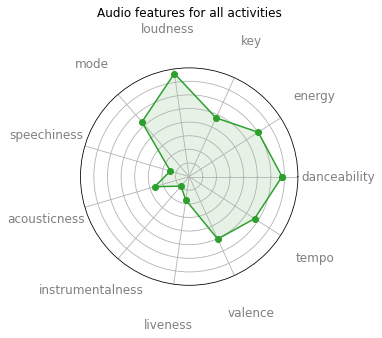

In [279]:
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['value'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           new_df['feat'], 
           color='grey', 
           size=12)

ax.tick_params(pad=30) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Audio features for all activities")
plt.show()

### Per activity type

In [280]:
df_temp = df.groupby('activity_type')\
    .agg(
    {
     'danceability':'mean',
     'energy':'mean',
     'key':'mean',
     'loudness':'mean',
     'mode':'mean',
     'speechiness':'mean',
     'acousticness':'mean',
     'instrumentalness':'mean',
     'liveness':'mean',
     'valence':'mean',
     'tempo':'mean'
    }
).reset_index()

act_types = df_temp[df_temp.columns[0]]

scaler = MinMaxScaler()

d = pd.DataFrame(
    columns=audio_feats_cols
)
for _col in df_temp.columns[1:]:
    d[f'{_col}'] = [x[0] for x in scaler.fit_transform(pd.DataFrame(df_temp[f'{_col}'].values.reshape(-1, 1))).tolist()]
    
df_temp = d.copy()
df_temp['activity_type'] = act_types

## Work

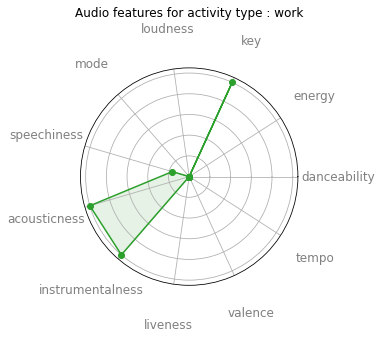

In [281]:
act_type = 'work'

#df_temp[df_temp.activity_type == f'{act_type}']

new_df = pd.DataFrame()

new_df.index = [
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo'
]
new_df.reset_index(inplace=True)
new_df.columns = ['feat']
new_df['value'] = 0

for _col in df_temp.columns[1:]:
    new_df.loc[new_df.feat == f'{_col}', 'value'] = df_temp[df_temp.activity_type == act_type][f'{_col}'].values[0]
    
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(new_df) + 1) / float(len(new_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = new_df['value'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           new_df['feat'], 
           color='grey', 
           size=12)

ax.tick_params(pad=30) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Audio features for activity type : {act_type}")
plt.show()

## Exercise

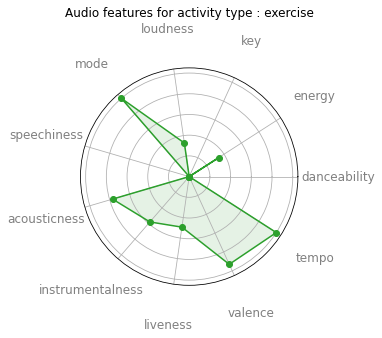

In [282]:
act_type = 'exercise'

#df_temp[df_temp.activity_type == f'{act_type}']

new_df = pd.DataFrame()

new_df.index = [
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo'
]
new_df.reset_index(inplace=True)
new_df.columns = ['feat']
new_df['value'] = 0

for _col in df_temp.columns[1:]:
    new_df.loc[new_df.feat == f'{_col}', 'value'] = df_temp[df_temp.activity_type == act_type][f'{_col}'].values[0]
    
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(new_df) + 1) / float(len(new_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = new_df['value'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           new_df['feat'], 
           color='grey', 
           size=12)

ax.tick_params(pad=30) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Audio features for activity type : {act_type}")
plt.show()

### Study

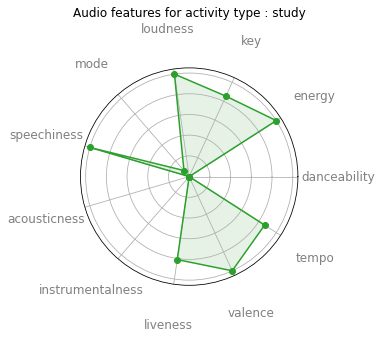

In [283]:
act_type = 'study'

#df_temp[df_temp.activity_type == f'{act_type}']

new_df = pd.DataFrame()

new_df.index = [
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo'
]
new_df.reset_index(inplace=True)
new_df.columns = ['feat']
new_df['value'] = 0

for _col in df_temp.columns[1:]:
    new_df.loc[new_df.feat == f'{_col}', 'value'] = df_temp[df_temp.activity_type == act_type][f'{_col}'].values[0]
    
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(new_df) + 1) / float(len(new_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = new_df['value'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           new_df['feat'], 
           color='grey', 
           size=12)

ax.tick_params(pad=30) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Audio features for activity type : {act_type}")
plt.show()

## Relax

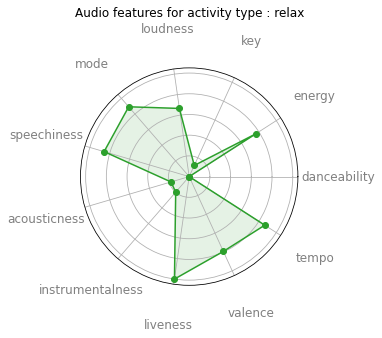

In [284]:
act_type = 'relax'

#df_temp[df_temp.activity_type == f'{act_type}']

new_df = pd.DataFrame()

new_df.index = [
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo'
]
new_df.reset_index(inplace=True)
new_df.columns = ['feat']
new_df['value'] = 0

for _col in df_temp.columns[1:]:
    new_df.loc[new_df.feat == f'{_col}', 'value'] = df_temp[df_temp.activity_type == act_type][f'{_col}'].values[0]
    
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(new_df) + 1) / float(len(new_df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = new_df['value'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           new_df['feat'], 
           color='grey', 
           size=12)

ax.tick_params(pad=30) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Audio features for activity type : {act_type}")
plt.show()

### Aggregate listen activity type

In [70]:
df = pd.read_csv('StreamingHistory3_enriched_activity.csv')
#df.head(5)
df_temp = df[['startTime', 'endTime', 'activity_type']].sort_values('startTime')

In [71]:
df_temp.head(5)

,startTime,endTime,activity_type
0,2021-12-30 19:05:21.835000,2021-12-30 19:06:00,study
2,2021-12-30 19:05:53.494000,2021-12-30 19:06:00,study
1,2021-12-30 19:05:55.776000,2021-12-30 19:06:00,study
4,2021-12-30 19:06:00.480000,2021-12-30 19:07:00,study
3,2021-12-30 19:06:44.065000,2021-12-30 19:07:00,study


In [72]:
df_new = pd.DataFrame(
    columns=[
        'start_time',
        'end_time',
        'activity'
    ]
)

df_temp = df_temp.sort_values(['startTime', 'endTime']).reset_index(drop=True)

In [73]:
df_temp = df_temp.sort_values(['startTime', 'endTime']).reset_index(drop=True)

df_temp['activity_nr'] = 0
activity_nr = 0
for idx, row in enumerate(df_temp.values):
    if idx == 0:
        df_temp.loc[idx, 'activity_nr'] = activity_nr
        continue
    if (df_temp.iloc[idx]['activity_type']!= df_temp.iloc[idx -1]['activity_type']) or (pd.to_datetime(df_temp.iloc[idx]['startTime']).day - pd.to_datetime(df_temp.iloc[idx - 1]['startTime']).day > 0):
        activity_nr += 1
        df_temp.loc[idx, 'activity_nr'] = activity_nr
        #print('new day')
        continue 
    elif df_temp.iloc[idx]['activity_type'] == df_temp.iloc[idx -1]['activity_type']:
        df_temp.loc[idx, 'activity_nr'] = activity_nr
    else:
        activity_nr += 1
        df_temp.loc[idx, 'activity_nr'] = activity_nr
    

In [74]:
df_temp.groupby(['activity_nr', 'activity_type']).agg({'startTime':'min', 'endTime':'max'})[['startTime','endTime']].reset_index().to_csv('manual_ish_inputs.csv', index=False)


#### Assign productivity level

In [75]:
import random
def assign_productivity_level(x):
    productivity_levels = [1, 2, 3, 4, 5]#, 6, 7, 8, 9, 10]
    weights = [10, 20, 30, 40, 50]#, 60, 70, 80, 90, 100]
    
    return random.choices(productivity_levels, 
                          weights=weights, 
                          k=1
                         )[0]
    

In [76]:
df = pd.read_csv('manual_ish_inputs.csv')
df.head(5)

,activity_nr,activity_type,startTime,endTime
0,0,study,2021-12-30 19:05:21.835000,2021-12-30 19:07:00
1,1,study,2021-12-31 09:53:43.872000,2021-12-31 11:26:00
2,2,relax,2021-12-31 13:22:05.748000,2021-12-31 23:53:00
3,3,study,2021-12-31 23:53:05.778000,2022-01-01 00:28:00
4,4,relax,2022-01-03 07:47:11.814000,2022-01-03 07:58:00


In [77]:
df['productivity_level'] = df.apply(lambda x: assign_productivity_level(x), axis=1)

In [78]:
df

,activity_nr,activity_type,startTime,endTime,productivity_level
0,0,study,2021-12-30 19:05:21.835000,2021-12-30 19:07:00,4
1,1,study,2021-12-31 09:53:43.872000,2021-12-31 11:26:00,3
2,2,relax,2021-12-31 13:22:05.748000,2021-12-31 23:53:00,5
3,3,study,2021-12-31 23:53:05.778000,2022-01-01 00:28:00,5
4,4,relax,2022-01-03 07:47:11.814000,2022-01-03 07:58:00,5
...,...,...,...,...,...
203,203,exercise,2022-03-30 19:05:33.961000,2022-03-30 20:48:00,5
204,204,relax,2022-03-31 06:38:51.574000,2022-03-31 09:40:00,5
205,205,work,2022-03-31 15:09:32.360000,2022-03-31 16:13:00,5
206,206,study,2022-03-31 20:37:47.840000,2022-04-01 11:20:00,3


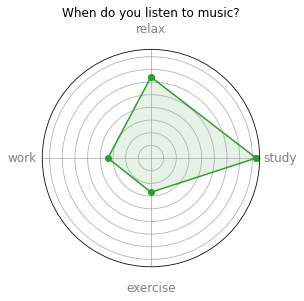

In [79]:
df_temp = pd.DataFrame(df['activity_type'].value_counts()).reset_index()
df_temp.columns = ['activity_type', 'count']
df_temp

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['activity_type'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("When do you listen to music?")
plt.show()

### Genres 

In [81]:
## Streaming History
df_hist = pd.read_csv('StreamingHistory3_enriched_activity.csv')
df_hist.head(5)

,endTime,track_id,track_name,track_artist,genres,msPlayed,audio_data,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,startTime,dayofweek_nr,day_name,startTime_hour,month_nr,month_name,activity_type
0,2021-12-30 19:06:00,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",38165.0,"[{'danceability': 0.803, 'energy': 0.597, 'key...",0.803,0.597,11,-6.035,0,0.141,0.000619,0.000005,0.3230,0.331,136.008,audio_features,0k1WUmIRnG3xU6fvvDVfRG,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,https://api.spotify.com/v1/tracks/0k1WUmIRnG3x...,https://api.spotify.com/v1/audio-analysis/0k1W...,257605,4,2021-12-30 19:05:21.835000,3,Thursday,19,12,December,study
1,2021-12-30 19:06:00,4eL3XeuGaEoVT8ttDh3hwY,too easy,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",4224.0,"[{'danceability': 0.798, 'energy': 0.574, 'key...",0.798,0.574,1,-6.548,1,0.157,0.024000,0.000000,0.1220,0.309,155.964,audio_features,4eL3XeuGaEoVT8ttDh3hwY,spotify:track:4eL3XeuGaEoVT8ttDh3hwY,https://api.spotify.com/v1/tracks/4eL3XeuGaEoV...,https://api.spotify.com/v1/audio-analysis/4eL3...,138587,4,2021-12-30 19:05:55.776000,3,Thursday,19,12,December,study
2,2021-12-30 19:06:00,5yY9lUy8nbvjM1Uyo1Uqoc,Life Is Good (feat. Drake),Future,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",6506.0,"[{'danceability': 0.676, 'energy': 0.609, 'key...",0.676,0.609,2,-5.831,0,0.481,0.070600,0.000000,0.1520,0.508,142.037,audio_features,5yY9lUy8nbvjM1Uyo1Uqoc,spotify:track:5yY9lUy8nbvjM1Uyo1Uqoc,https://api.spotify.com/v1/tracks/5yY9lUy8nbvj...,https://api.spotify.com/v1/audio-analysis/5yY9...,237735,4,2021-12-30 19:05:53.494000,3,Thursday,19,12,December,study
3,2021-12-30 19:07:00,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",15935.0,"[{'danceability': 0.803, 'energy': 0.597, 'key...",0.803,0.597,11,-6.035,0,0.141,0.000619,0.000005,0.3230,0.331,136.008,audio_features,0k1WUmIRnG3xU6fvvDVfRG,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,https://api.spotify.com/v1/tracks/0k1WUmIRnG3x...,https://api.spotify.com/v1/audio-analysis/0k1W...,257605,4,2021-12-30 19:06:44.065000,3,Thursday,19,12,December,study
4,2021-12-30 19:07:00,0k7wmahjkn389wAZdz19Cv,Drankin N Smokin,Future,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",59520.0,"[{'danceability': 0.752, 'energy': 0.658, 'key...",0.752,0.658,0,-6.297,1,0.342,0.042100,0.000000,0.0927,0.387,151.951,audio_features,0k7wmahjkn389wAZdz19Cv,spotify:track:0k7wmahjkn389wAZdz19Cv,https://api.spotify.com/v1/tracks/0k7wmahjkn38...,https://api.spotify.com/v1/audio-analysis/0k7w...,213520,4,2021-12-30 19:06:00.480000,3,Thursday,19,12,December,study


In [82]:
# Activity History
df_input = pd.read_csv('manual_ish_inputs.csv')
df_input.head(5)

,activity_nr,activity_type,startTime,endTime
0,0,study,2021-12-30 19:05:21.835000,2021-12-30 19:07:00
1,1,study,2021-12-31 09:53:43.872000,2021-12-31 11:26:00
2,2,relax,2021-12-31 13:22:05.748000,2021-12-31 23:53:00
3,3,study,2021-12-31 23:53:05.778000,2022-01-01 00:28:00
4,4,relax,2022-01-03 07:47:11.814000,2022-01-03 07:58:00


In [84]:
df_temp = pd.DataFrame(df_hist['genres'].explode().value_counts()).reset_index()
df_temp.columns = ['genres', 'count']
df_temp

,genres,count
0,"['danish hip hop', 'danish pop']",1123
1,[],601
2,['danish pop'],525
3,"['canadian hip hop', 'canadian pop', 'hip hop'...",291
4,"['dakke dak', 'danish hip hop', 'danish pop']",207
...,...,...
658,"['art rock', 'dance rock', 'disco', 'europop',...",1
659,"['classic hardstyle', 'rawstyle']",1
660,['rave funk'],1
661,"['pop teen brasileiro', 'viral pop brasileiro']",1


In [ ]:
df_temp = df[['startTime', 'endTime', 'activity_type']].sort_values('startTime')
fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df_temp['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, 
              values, 
              color="C2", 
              marker="o", 
              label="Name of Col B"
             )

plt.xticks(theta[:-1], 
           df_temp['genres'], 
           color='grey', 
           size=12)

ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("When do you listen to music?")
plt.show()

In [8]:
#import random

In [43]:
#import string
#string.ascii_letters
#random.choice(string.ascii_letters)

In [10]:
#[str(random.randint(1, 10)) for x in range(4)]

In [44]:
#[random.choice(string.ascii_letters) for x in range(4)]

In [45]:
#[random.choices(string.ascii_letters, weights=[x**40 for x in range(len(string.ascii_letters))])[0] for x in range(4)]

In [46]:
#[x**(-1**(x+1)) for x in range(1, 4)]

In [14]:
#[sum((-1)**(k+1) * k**20 for k in range(1, n + 1)) for n in range(len(string.ascii_letters))]

In [47]:
#[sum((-1)**(k+1) * k**2 for k in range(1, n + 1)) for n in range(len(string.ascii_letters))]

In [48]:
#weights = [sum((-1)**(k+1) * k**2 for k in range(1, n + 1)) for n in range(len(string.ascii_letters))]

In [49]:
#df['genres'] = df.apply(lambda x: [random.choices(string.ascii_letters, 
#                                                  weights=weights
#                                                 )[0] for x in range(2)], 
#                        axis=1
#                       )
#df.head(5)